In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
from dateutil.relativedelta import relativedelta
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.svm import SVC
%matplotlib inline

RANDOM_SEED=3412

In [2]:
train=pd.read_csv('./data/train_clean_c.csv')
train.info()
train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 25 columns):
CUST_COD               26884 non-null int64
LIMIT_BAL              26884 non-null float64
SEX                    26626 non-null object
EDUCATION              26571 non-null object
MARRIAGE               26834 non-null object
BIRTH_DATE             26182 non-null object
PAY_DEC                26884 non-null int64
PAY_NOV                26884 non-null int64
PAY_OCT                26884 non-null int64
PAY_SEP                26884 non-null int64
PAY_AUG                26884 non-null int64
PAY_JUL                26884 non-null int64
BILL_AMT_DEC           26884 non-null float64
BILL_AMT_NOV           26884 non-null float64
BILL_AMT_OCT           26884 non-null float64
BILL_AMT_SEP           26884 non-null float64
BILL_AMT_AUG           26884 non-null float64
BILL_AMT_JUL           26884 non-null float64
PAY_AMT_DEC            26884 non-null float64
PAY_AMT_NOV            26884 non-nu

,CUST_COD,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,...,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,DEFAULT PAYMENT JAN
0,53613503,1490.680,M,university,single,NaN,0,0,0,0,...,629.156401,599.283174,608.257067,89.440800,149.068000,68.571280,0.000000,29.813600,59.627200,0
1,35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,...,533.872135,-2.772665,-14.399969,149.068000,159.830710,29.813600,0.000000,0.000000,0.000000,1
2,58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,...,-19.349026,-19.349026,-19.349026,59.627200,532.590150,16.963938,0.000000,0.000000,29.813600,0
3,26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,...,88.546392,70.330282,253.177091,80.556347,217.221890,88.784901,70.628418,298.463950,216.416922,0
4,41993633,3577.632,F,graduate school,married,09/01/1978,-1,-1,-1,-1,...,0.000000,569.439760,0.000000,119.254400,29.813600,0.000000,569.439760,0.000000,0.000000,1
5,46414261,2385.088,M,university,single,27/01/1989,2,0,0,0,...,1670.515635,1706.768973,1744.542804,107.716537,92.422160,59.627200,62.608560,65.589920,60.849558,1
6,10438751,596.272,M,university,married,08/01/1985,1,2,0,0,...,591.978842,570.840999,607.273218,0.000000,38.847121,20.571384,25.371374,50.683120,0.000000,1
7,19267237,10732.896,F,university,single,16/01/1983,-1,-1,-1,-1,...,146.444403,34.285640,0.000000,293.962096,254.518703,146.444403,0.000000,0.000000,277.087598,0
8,39470148,1490.680,M,university,single,07/01/1992,2,0,0,0,...,582.080726,1051.466045,479.969146,89.440800,38.757680,19.140331,18.245923,35.537811,17.888160,1
9,24381216,1490.680,F,university,married,19/01/1992,0,0,0,0,...,741.762368,778.075333,801.568450,59.627200,104.496668,59.627200,238.508800,119.254400,108.819640,1


##### Analising BIRTH_DATE attribute

In [3]:
train["BIRTH_DATE"].describe()

count          26182
unique          1380
top       01/01/1988
freq              68
Name: BIRTH_DATE, dtype: object

Transforming bithdate in age

In [4]:
train["BIRTH_DATE"]= pd.to_datetime(train["BIRTH_DATE"]) 
now=datetime.datetime.now()
train["AGE"]=now-train["BIRTH_DATE"]
train["AGE"]=train["AGE"]/365.25
train["AGE"]=(train["AGE"] /np.timedelta64(1, 'D')).astype(str)


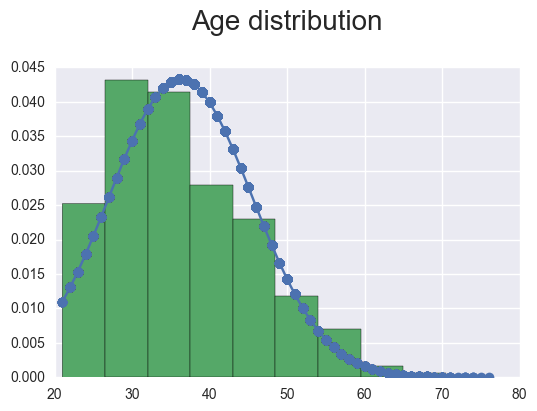

In [5]:
notNanAge=[]
for i in train["AGE"]:
    if(i!="nan"):
        notNanAge.append(int(float(i)))
notNanAge.sort()
notNanAge_mean = np.mean(notNanAge)
notNanAge_std = np.std(notNanAge)
pdf = stats.norm.pdf(notNanAge, notNanAge_mean, notNanAge_std)
plt.plot(notNanAge, pdf,'-o')
plt.hist(notNanAge,normed=True) 
plt.title('Age distribution', size=20, y=1.1)


In [6]:
plt.show()

In [7]:
print(min(notNanAge))
print(max(notNanAge))

21
76


Similar to a Gaussian distribution, for the moment we replace "nan" with the mean value

In [8]:
train["BIRTH_DATE"]=train["AGE"]
train["BIRTH_DATE"]=train["BIRTH_DATE"].replace("nan",notNanAge_mean)
train=train.drop("AGE",1)

train["BIRTH_DATE"]=train["BIRTH_DATE"].astype(float)
train["BIRTH_DATE"]=train["BIRTH_DATE"].astype(int)

__Default Payment__

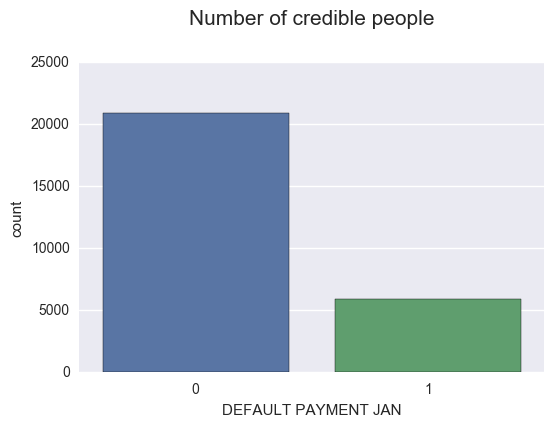

In [9]:
plt.title('Number of credible people', y=1.1, size=15)
sns.countplot('DEFAULT PAYMENT JAN', data=train)

## Marriage

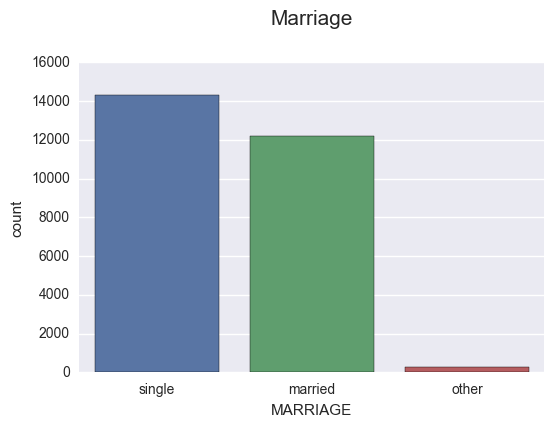

In [10]:
plt.title('Marriage', size=15, y=1.1)
sns.countplot(x ='MARRIAGE', data=train)

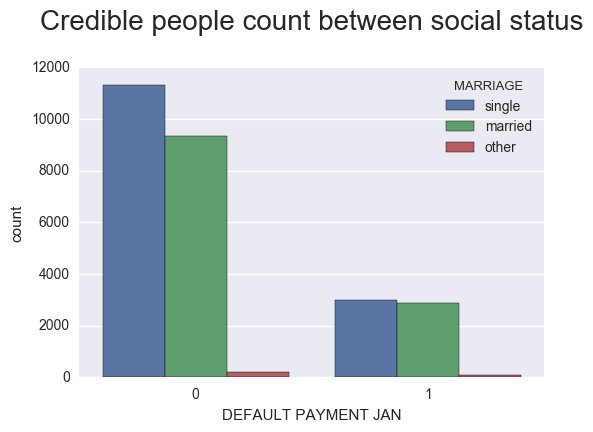

In [11]:
plt.title('Credible people count between social status', size=20, y=1.1)
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue='MARRIAGE', data=train)

The number of single and married people between insolvent people is almost the same, so maybe this attribute is not very significant to do the analysis (?).
Fill missing values with single since they are the prevailing class

In [12]:
train["MARRIAGE"]=train["MARRIAGE"].fillna("single")

# SEX

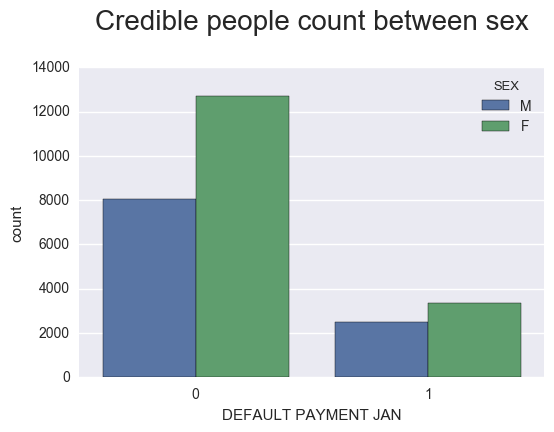

In [13]:
plt.title('Credible people count between sex', size=20, y=1.1)
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue='SEX', data=train)

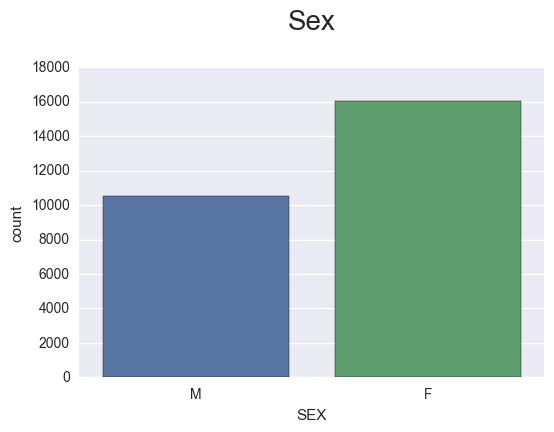

In [14]:
plt.title('Sex', size=20, y=1.1)
sns.countplot(x='SEX', data=train)

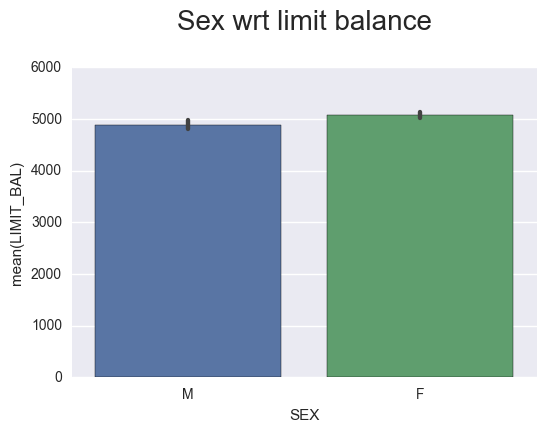

In [15]:
plt.title('Sex wrt limit balance', size=20, y=1.1)
sns.barplot(x = 'SEX', y='LIMIT_BAL', data=train)

The limit balance given to women is a little bit higher than the one given to man.
Fill missing values with female since they are the prevailing class

In [16]:
train["SEX"]=train["SEX"].fillna("F")

__Limit Balance__

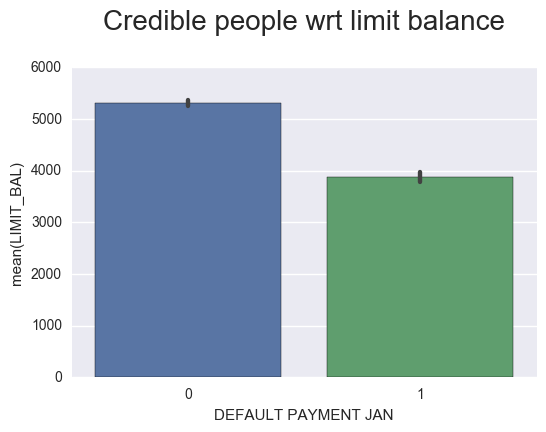

In [17]:
plt.title('Credible people wrt limit balance', size=20, y=1.1)
sns.barplot(x = 'DEFAULT PAYMENT JAN', y='LIMIT_BAL', data=train)

It's important to notice that also people with a relatively high limit balance, went in default payment during January

# EDUCATION

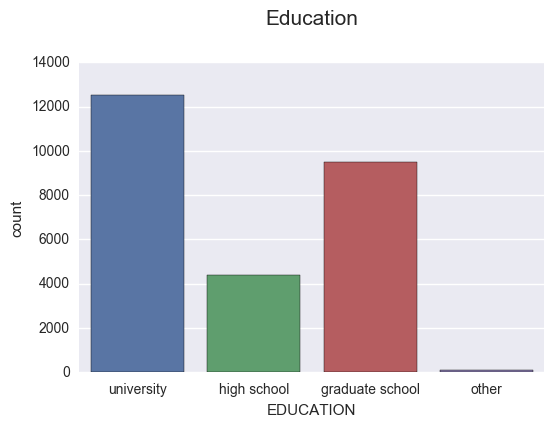

In [18]:
plt.title('Education',size=15,y=1.1)
sns.countplot(x='EDUCATION',data=train)

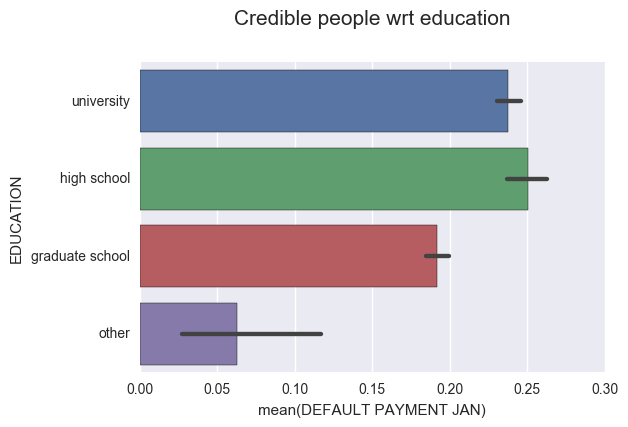

In [19]:
plt.title('Credible people wrt education', size=15, y=1.1)
sns.barplot(x = 'DEFAULT PAYMENT JAN', y='EDUCATION', data=train)

People from "high scool" education seem on average, more to be in defalult in January, probably because they have a smaller salary or they are less prudent in spending their money. Let's look at their limit balance

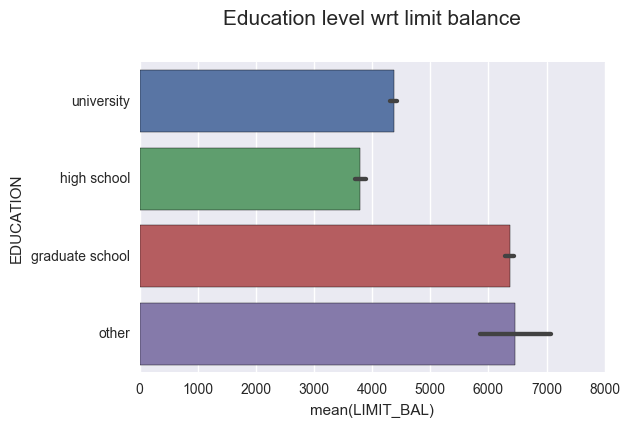

In [20]:
plt.title('Education level wrt limit balance', size=15, y=1.1)
sns.barplot(x = 'LIMIT_BAL', y='EDUCATION', data=train)

Indeed people from high school have a lower limit balance and this probably means that they can give less
guarantees, beacause they don't earn a lot.
Let's also fill nan with "university" that is the majority class 

In [21]:
train["EDUCATION"]=train["EDUCATION"].fillna("university")

#### ADDING NEW FEATURES 

In [22]:
train["TOT_AMT_GIVEN_BACK"]=train["PAY_AMT_DEC"]+train["PAY_AMT_NOV"]+train["PAY_AMT_OCT"]+train["PAY_AMT_SEP"]+train["PAY_AMT_AUG"]+train["PAY_AMT_JUL"]
train['TOT_AMT_GIVEN_BACK'].describe()

count     26884.000000
mean        950.194554
std        1842.985628
min           0.000000
25%         199.803294
50%         430.582918
75%        1001.908388
max      112220.358100
Name: TOT_AMT_GIVEN_BACK, dtype: float64

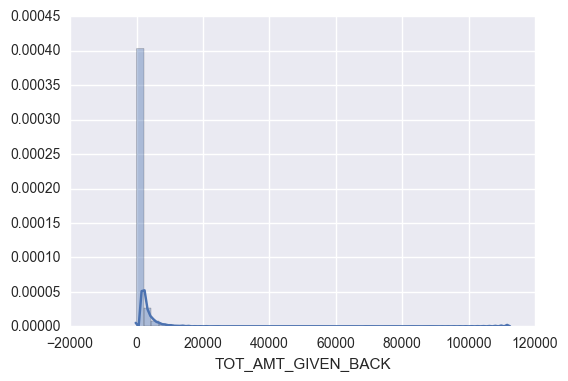

In [23]:
sns.distplot(train['TOT_AMT_GIVEN_BACK'])

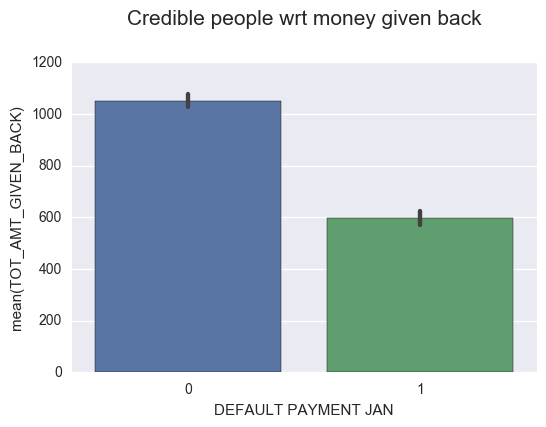

In [24]:
plt.title('Credible people wrt money given back', size=15, y=1.1)
sns.barplot(x = 'DEFAULT PAYMENT JAN', y='TOT_AMT_GIVEN_BACK', data=train)

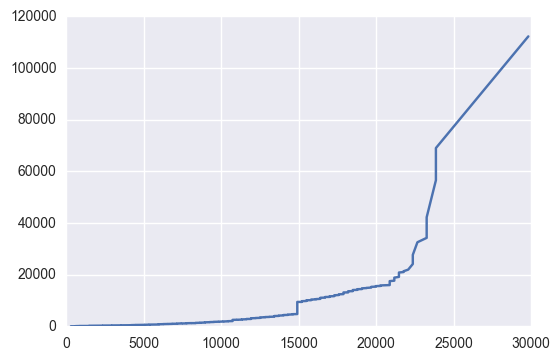

In [25]:
x=sorted(train["LIMIT_BAL"])
y=sorted(train["TOT_AMT_GIVEN_BACK"])
plt.plot(x,y)

In [26]:
train["DELTA_BILL-PAY_DEC"]=train["BILL_AMT_DEC"]-train["PAY_AMT_DEC"]
train["DELTA_BILL-PAY_NOV"]=train["BILL_AMT_NOV"]-train["PAY_AMT_NOV"]
train["DELTA_BILL-PAY_OCT"]=train["BILL_AMT_OCT"]-train["PAY_AMT_OCT"]
train["DELTA_BILL-PAY_SEP"]=train["BILL_AMT_SEP"]-train["PAY_AMT_SEP"]
train["DELTA_BILL-PAY_AUG"]=train["BILL_AMT_AUG"]-train["PAY_AMT_AUG"]
train["DELTA_BILL-PAY_JUL"]=train["BILL_AMT_JUL"]-train["PAY_AMT_JUL"]

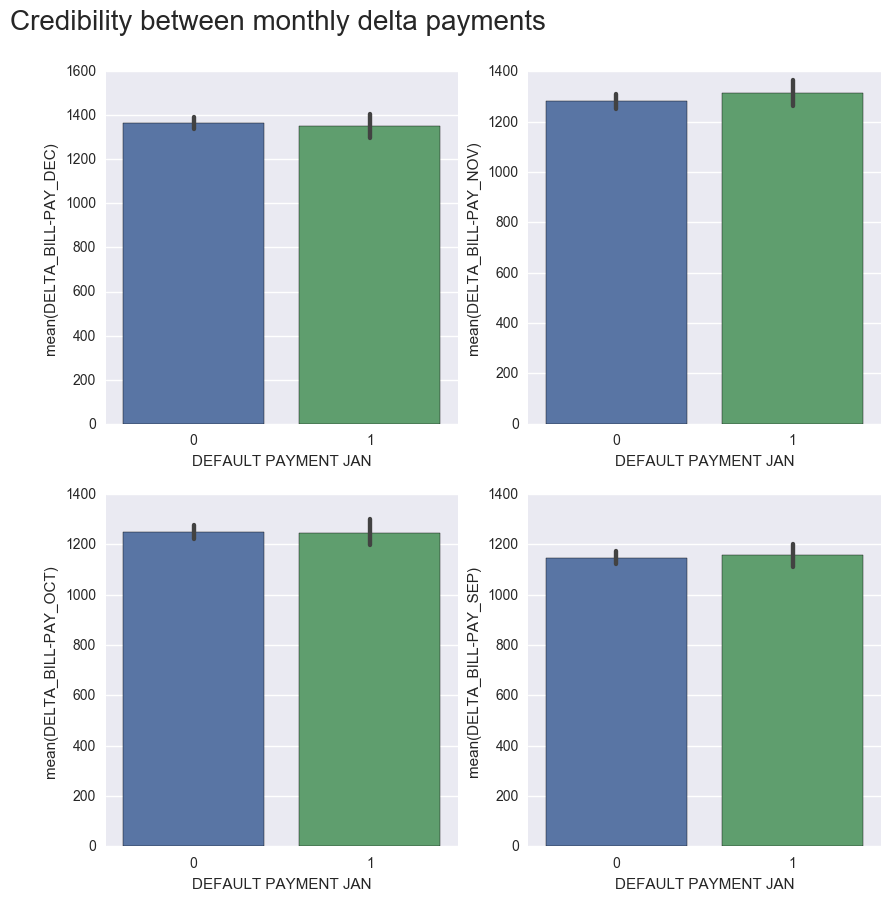

In [27]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.title('Credibility between monthly delta payments ', size=20, y=1.1)
sns.barplot(x = 'DEFAULT PAYMENT JAN', y='DELTA_BILL-PAY_DEC', data=train)
plt.subplot(2,2,2)

sns.barplot(x = 'DEFAULT PAYMENT JAN', y='DELTA_BILL-PAY_NOV', data=train)
plt.subplot(2,2,3)

sns.barplot(x = 'DEFAULT PAYMENT JAN', y='DELTA_BILL-PAY_OCT', data=train)
plt.subplot(2,2,4)
sns.barplot(x = 'DEFAULT PAYMENT JAN', y='DELTA_BILL-PAY_SEP', data=train)


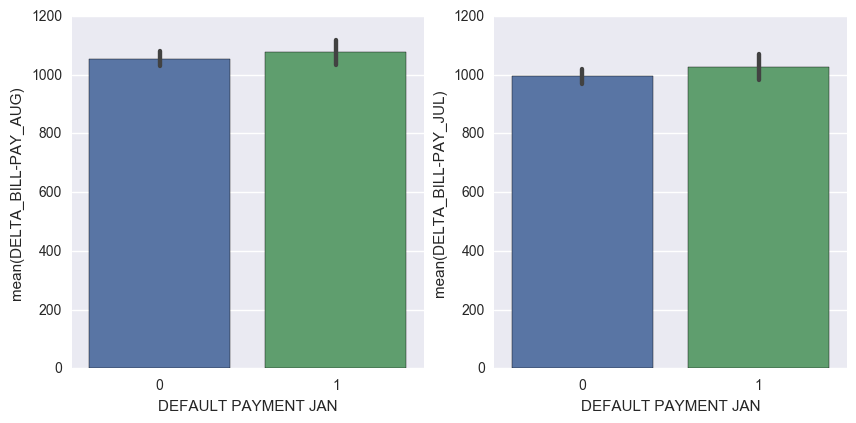

In [28]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.barplot(x = 'DEFAULT PAYMENT JAN', y='DELTA_BILL-PAY_AUG', data=train)
plt.subplot(2,2,2)
sns.barplot(x = 'DEFAULT PAYMENT JAN', y='DELTA_BILL-PAY_JUL', data=train)

People that in January are in deafult, have monthly, on average a greather or equal debit to pay, than people that are not in default. This happens in every month except December, where it's exactly the opposite

#### DATA TRANSFORMATION

In [29]:
for df in [train]:
    df['SEX'] = df['SEX'].apply(lambda x : 1 if x == 'M' else 0)
for df in [train]:
    df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x : 1 if x == 'single' else 0)
train = pd.get_dummies(train, columns=['EDUCATION'])
train.head(10)

,CUST_COD,LIMIT_BAL,SEX,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,...,DELTA_BILL-PAY_DEC,DELTA_BILL-PAY_NOV,DELTA_BILL-PAY_OCT,DELTA_BILL-PAY_SEP,DELTA_BILL-PAY_AUG,DELTA_BILL-PAY_JUL,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,53613503,1490.680,1,1,36,0,0,0,0,2,...,1405.413104,313.609258,513.390192,629.156401,569.469574,548.629867,0.0,0.0,0.0,1.0
1,35524089,5664.584,1,0,34,0,0,0,0,0,...,2796.933070,2886.344056,3107.471528,533.872135,-2.772665,-14.399969,0.0,0.0,0.0,1.0
2,58777007,6260.856,0,0,42,0,0,-1,-1,-2,...,1701.491966,1221.343938,-6.111788,-19.349026,-19.349026,-49.162626,0.0,1.0,0.0,0.0
3,26913418,8944.080,0,0,40,-2,-2,-2,-2,-2,...,8.079486,-136.904051,127.959971,17.917974,-228.133667,36.760169,1.0,0.0,0.0,0.0
4,41993633,3577.632,0,0,38,-1,-1,-1,-1,-1,...,-90.037072,89.440800,29.813600,-569.439760,569.439760,0.000000,1.0,0.0,0.0,0.0
5,46414261,2385.088,1,1,28,2,0,0,0,0,...,2184.830049,2252.805057,2286.464611,1607.907075,1641.179053,1683.693246,0.0,0.0,0.0,1.0
6,10438751,596.272,1,0,31,1,2,0,0,0,...,645.017236,549.941666,559.869594,566.607468,520.157879,607.273218,0.0,0.0,0.0,1.0
7,19267237,10732.896,0,1,34,-1,-1,-1,-1,0,...,-134.638218,39.204884,6.708060,146.444403,34.285640,-277.087598,0.0,0.0,0.0,1.0
8,39470148,1490.680,1,1,24,2,0,0,0,0,...,1199.907959,1303.927610,1304.106491,563.834803,1015.928234,462.080986,0.0,0.0,0.0,1.0
9,24381216,1490.680,0,0,25,0,0,0,0,0,...,1399.092621,868.798118,877.354621,503.253568,658.820933,692.748810,0.0,0.0,0.0,1.0


Male=1 Female=0
Single=1 Married=0

#### REFINEMENT TO APPLY ALGORITHMS 

In [30]:
train_y = train['DEFAULT PAYMENT JAN'].ravel()
train_x = train.drop(['DEFAULT PAYMENT JAN', 'CUST_COD'], axis=1)

for df in [train_x]:
    for col in df.columns:
        df[col] = df[col].astype('int')

#### VALIDATION SET

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(train_x, train_y, test_size=0.3, random_state=RANDOM_SEED)


x_train.index = np.arange(len(x_train))
x_validation.index = np.arange(len(x_validation))

## MODEL SELECTION

__ Logistic regression__

In [42]:
lr_params = {
    'C' : [1],
    'fit_intercept' : [True],
    'max_iter' : [5000],
    'solver' : ['newton-cg'],
    'tol' : [1e-4],
    'random_state' : [RANDOM_SEED]
}

log_regression = linear_model.LogisticRegression()
acc_scorer = make_scorer(f1_score)
log_reg_models = GridSearchCV(log_regression, lr_params, scoring=acc_scorer, n_jobs=-1)
log_reg_models = log_reg_models.fit(x_train, y_train)

lr_best = log_reg_models.best_estimator_
lr_best = lr_best.fit(x_train, y_train)

lr_model = {
    'Name' : 'Logistic regression', 
    'CVScore' : log_reg_models.best_score_, 
    'CVStd' : log_reg_models.cv_results_['std_test_score'][log_reg_models.best_index_],
    'Result_train' : lr_best.predict(x_train),
    
    'Model' : lr_best
}

/Users/carmen/anaconda/lib/python3.5/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/carmen/anaconda/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/carmen/anaconda/lib/python3.5/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/carmen/anaconda/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/carmen/anaconda/lib/python3.5/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings

In [43]:
print('Best model - avg:', 
      lr_model['CVScore'],
      '+/-', 
      lr_model['CVStd'])
print()
print(log_reg_models.best_estimator_)

#a mess but, maybe not all features must be considered

Best model - avg: 0.370202122485 +/- 0.0130609842168

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=3412, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)


__Random forest__

In [55]:
rf_params = {
    'n_estimators' :  [50],
    'max_features' : ['log2'],
    'criterion' : ['gini'],
    'min_samples_split' :  [16],
    'min_samples_leaf' : [1],
    'random_state' : [RANDOM_SEED]
}

random_forest = ensemble.RandomForestClassifier()
acc_scorer = make_scorer(f1_score)
rf_models = GridSearchCV(random_forest, rf_params, scoring=acc_scorer, n_jobs=-1)
rf_models = rf_models.fit(x_train, y_train)

rf_best = rf_models.best_estimator_
rf_best = rf_best.fit(x_train, y_train)

rf_model = {
    'Name' : 'Random forest', 
    'CVScore' : rf_models.best_score_, 
    'CVStd' : rf_models.cv_results_['std_test_score'][rf_models.best_index_],
    'Result_train' : rf_best.predict(x_train),
    'Model' : rf_best
}

In [56]:
best_idx = rf_models.best_index_
print('Best model - avg:', 
      rf_model['CVScore'],
      '+/-', 
      rf_model['CVStd'])
print()
print(rf_models.best_estimator_)

Best model - avg: 0.456733220459 +/- 0.00408435421729

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=16, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=3412,
            verbose=0, warm_start=False)


**Normalization**

In [51]:
train_conc = pd.concat([x_train, x_validation], ignore_index=True)
train_normalized = preprocessing.scale(train_conc)
x_train_normalized = train_normalized[:len(x_train), :]
x_validation_normalized = train_normalized[len(x_train):, :]

__Support Vector Classifer__

In [63]:
svm_params = {
    'C' : [0.3],
    'kernel' : ['rbf'],
    'tol' : [1e-3],
    'degree' : [2],
    'random_state' : [RANDOM_SEED]
}
acc_scorer = make_scorer(f1_score)
svc = SVC()
svc_classifiers = GridSearchCV(svc, svm_params, scoring=acc_scorer, n_jobs=-1)
svc_classifiers = svc_classifiers.fit(x_train_normalized, y_train)

svc_best = svc_classifiers.best_estimator_
svc_best = svc_best.fit(x_train_normalized, y_train)

svc_model = {
    'Name' : 'SVC', 
    'CVScore' : svc_classifiers.best_score_, 
    'CVStd' : svc_classifiers.cv_results_['std_test_score'][svc_classifiers.best_index_],
    'Result_train' : svc_best.predict(x_train_normalized),
    'Model' : svc_best
}

In [64]:
best_idx = svc_classifiers.best_index_
print('Best model - avg:', 
      svc_model['CVScore'], 
      '+/-', 
      svc_model['CVStd'])
print()
print(svc_classifiers.best_estimator_)

Best model - avg: 0.426844206196 +/- 0.00618750310292

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=3412, shrinking=True,
  tol=0.001, verbose=False)


## NEXT WORK
I think that some features must be eliminated in order to produce a better result.
Other alghorithms and these one with other parameters must be considered.
Modify threshold in order to obtain an higher recall.
